# Crime Data Preprocessing for Safe Route Finder

This notebook focuses on preprocessing crime data from Los Angeles to develop a safe route recommendation system. By analyzing historical crime data and identifying patterns, this project aims to provide users with safer navigation options throughout the city.

## Importing Required Libraries

In this section, we will import the necessary libraries for data manipulation, analysis, and visualization. 

In [85]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Loading Data

The dataset is obtained from Kaggle, https://www.kaggle.com/datasets/kushsheth/los-angeles-police-department-lapd-crime-data

A collection of crime records from Los Angeles, containing details about each crime incident, including location, time, type of crime, and other relevant features. Each sample has information that spans various features such as the date of occurrence, area, crime description, and geographical coordinates.

The overview of this dataset is that it contains **982,639 samples** with **28 features**. Download the dataset from the link provided to follow along.


In [86]:
df = pd.read_csv(r'C:\Users\HP\Desktop\University\Python\project\Crime_Data_from_2020_to_Present_20241002.csv')

## Basic Information and Overview
The code provides a brief overview. `.head()` displays the first few rows, `.info()` shows the structure, and `.describe()` gives summary statistics for numeric columns.

In [87]:
# Display first few rows
df.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,190326475,03/01/2020 12:00:00 AM,03/01/2020 12:00:00 AM,2130,7,Wilshire,784,1,510,VEHICLE - STOLEN,...,AA,Adult Arrest,510.0,998.0,NaN,NaN,1900 S LONGWOOD AV,NaN,34.0375,-118.3506
1,200106753,02/09/2020 12:00:00 AM,02/08/2020 12:00:00 AM,1800,1,Central,182,1,330,BURGLARY FROM VEHICLE,...,IC,Invest Cont,330.0,998.0,NaN,NaN,1000 S FLOWER ST,NaN,34.0444,-118.2628
2,200320258,11/11/2020 12:00:00 AM,11/04/2020 12:00:00 AM,1700,3,Southwest,356,1,480,BIKE - STOLEN,...,IC,Invest Cont,480.0,NaN,NaN,NaN,1400 W 37TH ST,NaN,34.0210,-118.3002
3,200907217,05/10/2023 12:00:00 AM,03/10/2020 12:00:00 AM,2037,9,Van Nuys,964,1,343,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),...,IC,Invest Cont,343.0,NaN,NaN,NaN,14000 RIVERSIDE DR,NaN,34.1576,-118.4387
4,220614831,08/18/2022 12:00:00 AM,08/17/2020 12:00:00 AM,1200,6,Hollywood,666,2,354,THEFT OF IDENTITY,...,IC,Invest Cont,354.0,NaN,NaN,NaN,1900 TRANSIENT,NaN,34.0944,-118.3277


In [88]:
# Show shape of the dataset
df.shape

(982638, 28)

In [89]:
# Columns of dataset
df.columns

Index(['DR_NO', 'Date Rptd', 'DATE OCC', 'TIME OCC', 'AREA', 'AREA NAME',
       'Rpt Dist No', 'Part 1-2', 'Crm Cd', 'Crm Cd Desc', 'Mocodes',
       'Vict Age', 'Vict Sex', 'Vict Descent', 'Premis Cd', 'Premis Desc',
       'Weapon Used Cd', 'Weapon Desc', 'Status', 'Status Desc', 'Crm Cd 1',
       'Crm Cd 2', 'Crm Cd 3', 'Crm Cd 4', 'LOCATION', 'Cross Street', 'LAT',
       'LON'],
      dtype='object')

In [90]:
# Dataset summary info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 982638 entries, 0 to 982637
Data columns (total 28 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DR_NO           982638 non-null  int64  
 1   Date Rptd       982638 non-null  object 
 2   DATE OCC        982638 non-null  object 
 3   TIME OCC        982638 non-null  int64  
 4   AREA            982638 non-null  int64  
 5   AREA NAME       982638 non-null  object 
 6   Rpt Dist No     982638 non-null  int64  
 7   Part 1-2        982638 non-null  int64  
 8   Crm Cd          982638 non-null  int64  
 9   Crm Cd Desc     982638 non-null  object 
 10  Mocodes         837376 non-null  object 
 11  Vict Age        982638 non-null  int64  
 12  Vict Sex        844193 non-null  object 
 13  Vict Descent    844182 non-null  object 
 14  Premis Cd       982624 non-null  float64
 15  Premis Desc     982053 non-null  object 
 16  Weapon Used Cd  326167 non-null  float64
 17  Weapon Des

In [91]:
# Unique values per column

df.nunique()

DR_NO             982638
Date Rptd           1735
DATE OCC            1735
TIME OCC            1439
AREA                  21
AREA NAME             21
Rpt Dist No         1209
Part 1-2               2
Crm Cd               140
Crm Cd Desc          140
Mocodes           309364
Vict Age             104
Vict Sex               5
Vict Descent          20
Premis Cd            314
Premis Desc          306
Weapon Used Cd        79
Weapon Desc           79
Status                 6
Status Desc            6
Crm Cd 1             142
Crm Cd 2             126
Crm Cd 3              37
Crm Cd 4               6
LOCATION           66265
Cross Street       10326
LAT                 5424
LON                 4980
dtype: int64

In [92]:
# Summary stats

df.describe().T

,count,mean,std,min,25%,50%,75%,max
DR_NO,982638.0,2.197437e+08,1.294954e+07,817.0000,2.106089e+08,2.208146e+08,2.309153e+08,2.499253e+08
TIME OCC,982638.0,1.338945e+03,6.515378e+02,1.0000,9.000000e+02,1.420000e+03,1.900000e+03,2.359000e+03
AREA,982638.0,1.070028e+01,6.107808e+00,1.0000,5.000000e+00,1.100000e+01,1.600000e+01,2.100000e+01
Rpt Dist No,982638.0,1.116460e+03,6.108938e+02,101.0000,5.870000e+02,1.141000e+03,1.617000e+03,2.199000e+03
Part 1-2,982638.0,1.404253e+00,4.907471e-01,1.0000,1.000000e+00,1.000000e+00,2.000000e+00,2.000000e+00
Crm Cd,982638.0,5.008236e+02,2.062119e+02,110.0000,3.310000e+02,4.420000e+02,6.260000e+02,9.560000e+02
Vict Age,982638.0,2.907982e+01,2.197009e+01,-4.0000,0.000000e+00,3.000000e+01,4.400000e+01,1.200000e+02
Premis Cd,982624.0,3.061330e+02,2.190538e+02,101.0000,1.010000e+02,2.030000e+02,5.010000e+02,9.760000e+02
Weapon Used Cd,326167.0,3.638409e+02,1.236847e+02,101.0000,3.110000e+02,4.000000e+02,4.000000e+02,5.160000e+02
Crm Cd 1,982627.0,5.005787e+02,2.060104e+02,110.0000,3.310000e+02,4.420000e+02,6.260000e+02,9.560000e+02


## Missing Values
A heatmap is used to visualize missing values across the dataset, helping us identify where data might be incomplete.

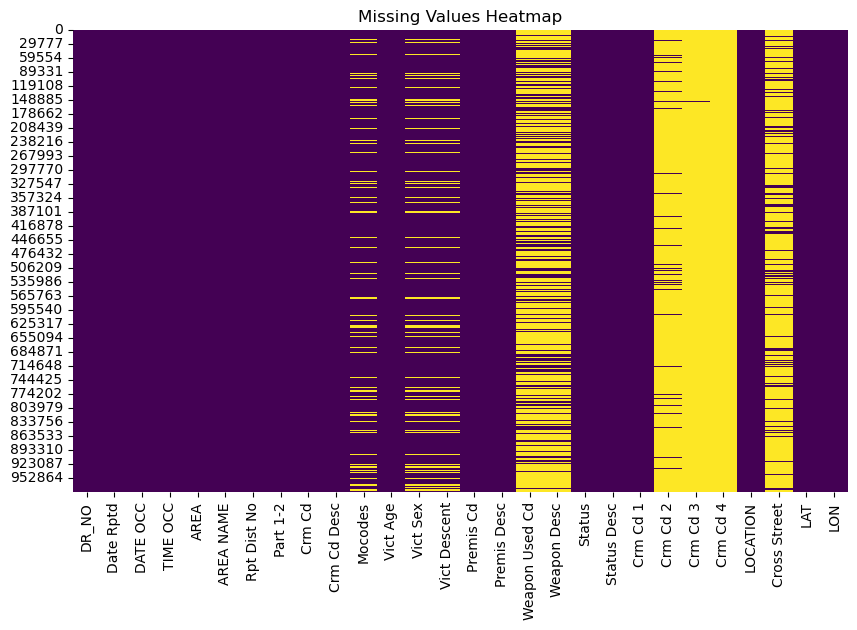

DR_NO                  0
Date Rptd              0
DATE OCC               0
TIME OCC               0
AREA                   0
AREA NAME              0
Rpt Dist No            0
Part 1-2               0
Crm Cd                 0
Crm Cd Desc            0
Mocodes           145262
Vict Age               0
Vict Sex          138445
Vict Descent      138456
Premis Cd             14
Premis Desc          585
Weapon Used Cd    656471
Weapon Desc       656471
Status                 1
Status Desc            0
Crm Cd 1              11
Crm Cd 2          913763
Crm Cd 3          980327
Crm Cd 4          982574
LOCATION               0
Cross Street      830789
LAT                    0
LON                    0
dtype: int64

In [93]:
# Check for missing values
missing_values = df.isnull().sum()
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

missing_values


## Dropping Columns

In [94]:
columns_to_drop = ['DR_NO', 'Date Rptd', 'Rpt Dist No', 'Part 1-2', 'Crm Cd 1', 'Crm Cd 2', 'Crm Cd 3', 'Crm Cd 4', 'Mocodes', 'Vict Age', 'Vict Sex', 'Vict Descent', 'Premis Cd', 'Premis Desc', 'Weapon Used Cd', 'Weapon Desc', 'Status', 'Status Desc', 'Cross Street']
df.drop(columns=columns_to_drop, inplace=True, errors='ignore')
df.head()

,DATE OCC,TIME OCC,AREA,AREA NAME,Crm Cd,Crm Cd Desc,LOCATION,LAT,LON
0,03/01/2020 12:00:00 AM,2130,7,Wilshire,510,VEHICLE - STOLEN,1900 S LONGWOOD AV,34.0375,-118.3506
1,02/08/2020 12:00:00 AM,1800,1,Central,330,BURGLARY FROM VEHICLE,1000 S FLOWER ST,34.0444,-118.2628
2,11/04/2020 12:00:00 AM,1700,3,Southwest,480,BIKE - STOLEN,1400 W 37TH ST,34.0210,-118.3002
3,03/10/2020 12:00:00 AM,2037,9,Van Nuys,343,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),14000 RIVERSIDE DR,34.1576,-118.4387
4,08/17/2020 12:00:00 AM,1200,6,Hollywood,354,THEFT OF IDENTITY,1900 TRANSIENT,34.0944,-118.3277


## Standardizing Date Column
First, let's standardize the `DATE OCC` column to ensure all dates are in a consistent format (YYYY-MM-DD).


In [95]:
# Standardizing the 'DATE OCC' column
import pandas as pd

# Assuming 'df' is your dataset
df['DATE OCC'] = pd.to_datetime(df['DATE OCC'], format='%m/%d/%Y %I:%M:%S %p').dt.date

# Display the first few rows to verify changes
df[['DATE OCC']].head()


,DATE OCC
0,2020-03-01
1,2020-02-08
2,2020-11-04
3,2020-03-10
4,2020-08-17


## Standardizing Time Column
Now, we'll standardize the `TIME OCC` column to convert the time into a consistent 24-hour format.



In [96]:
# Define the function to standardize time values
def standardize_time(time):
    # Convert time from an integer format (like 2130) to hh:mm format
    time_str = f"{int(time):04d}"  # Ensure time is four digits (e.g., 2130 becomes '2130')
    return f"{time_str[:2]}:{time_str[2:]}"  # Format as 'hh:mm'

# Apply the function to the 'TIME OCC' column
df['TIME OCC'] = df['TIME OCC'].apply(standardize_time)
df['TIME OCC'] = pd.to_datetime(df['TIME OCC'], format='%H:%M')
# Display the first few rows to verify changes
df[['TIME OCC']].head()
print(df.dtypes)


DATE OCC               object
TIME OCC       datetime64[ns]
AREA                    int64
AREA NAME              object
Crm Cd                  int64
Crm Cd Desc            object
LOCATION               object
LAT                   float64
LON                   float64
dtype: object


## Standardizing String Columns to Lower Case
Since all string data is currently in upper case, we will convert them to lower case to maintain consistency across the dataset.


In [97]:
# List of string columns that need to be converted to lower case
string_columns = ['Crm Cd Desc', 'AREA NAME', 'LOCATION']

# Apply the transformation: converting to lower case and removing leading/trailing spaces
for col in string_columns:
    df[col] = df[col].str.lower().str.strip()

# Display the first few rows to verify the changes
df[string_columns].head()


,Crm Cd Desc,AREA NAME,LOCATION
0,vehicle - stolen,wilshire,1900 s longwood av
1,burglary from vehicle,central,1000 s flower st
2,bike - stolen,southwest,1400 w 37th st
3,shoplifting-grand theft ($950.01 & over),van nuys,14000 riverside dr
4,theft of identity,hollywood,1900 transient


## Distribution of numeric columns using histograms

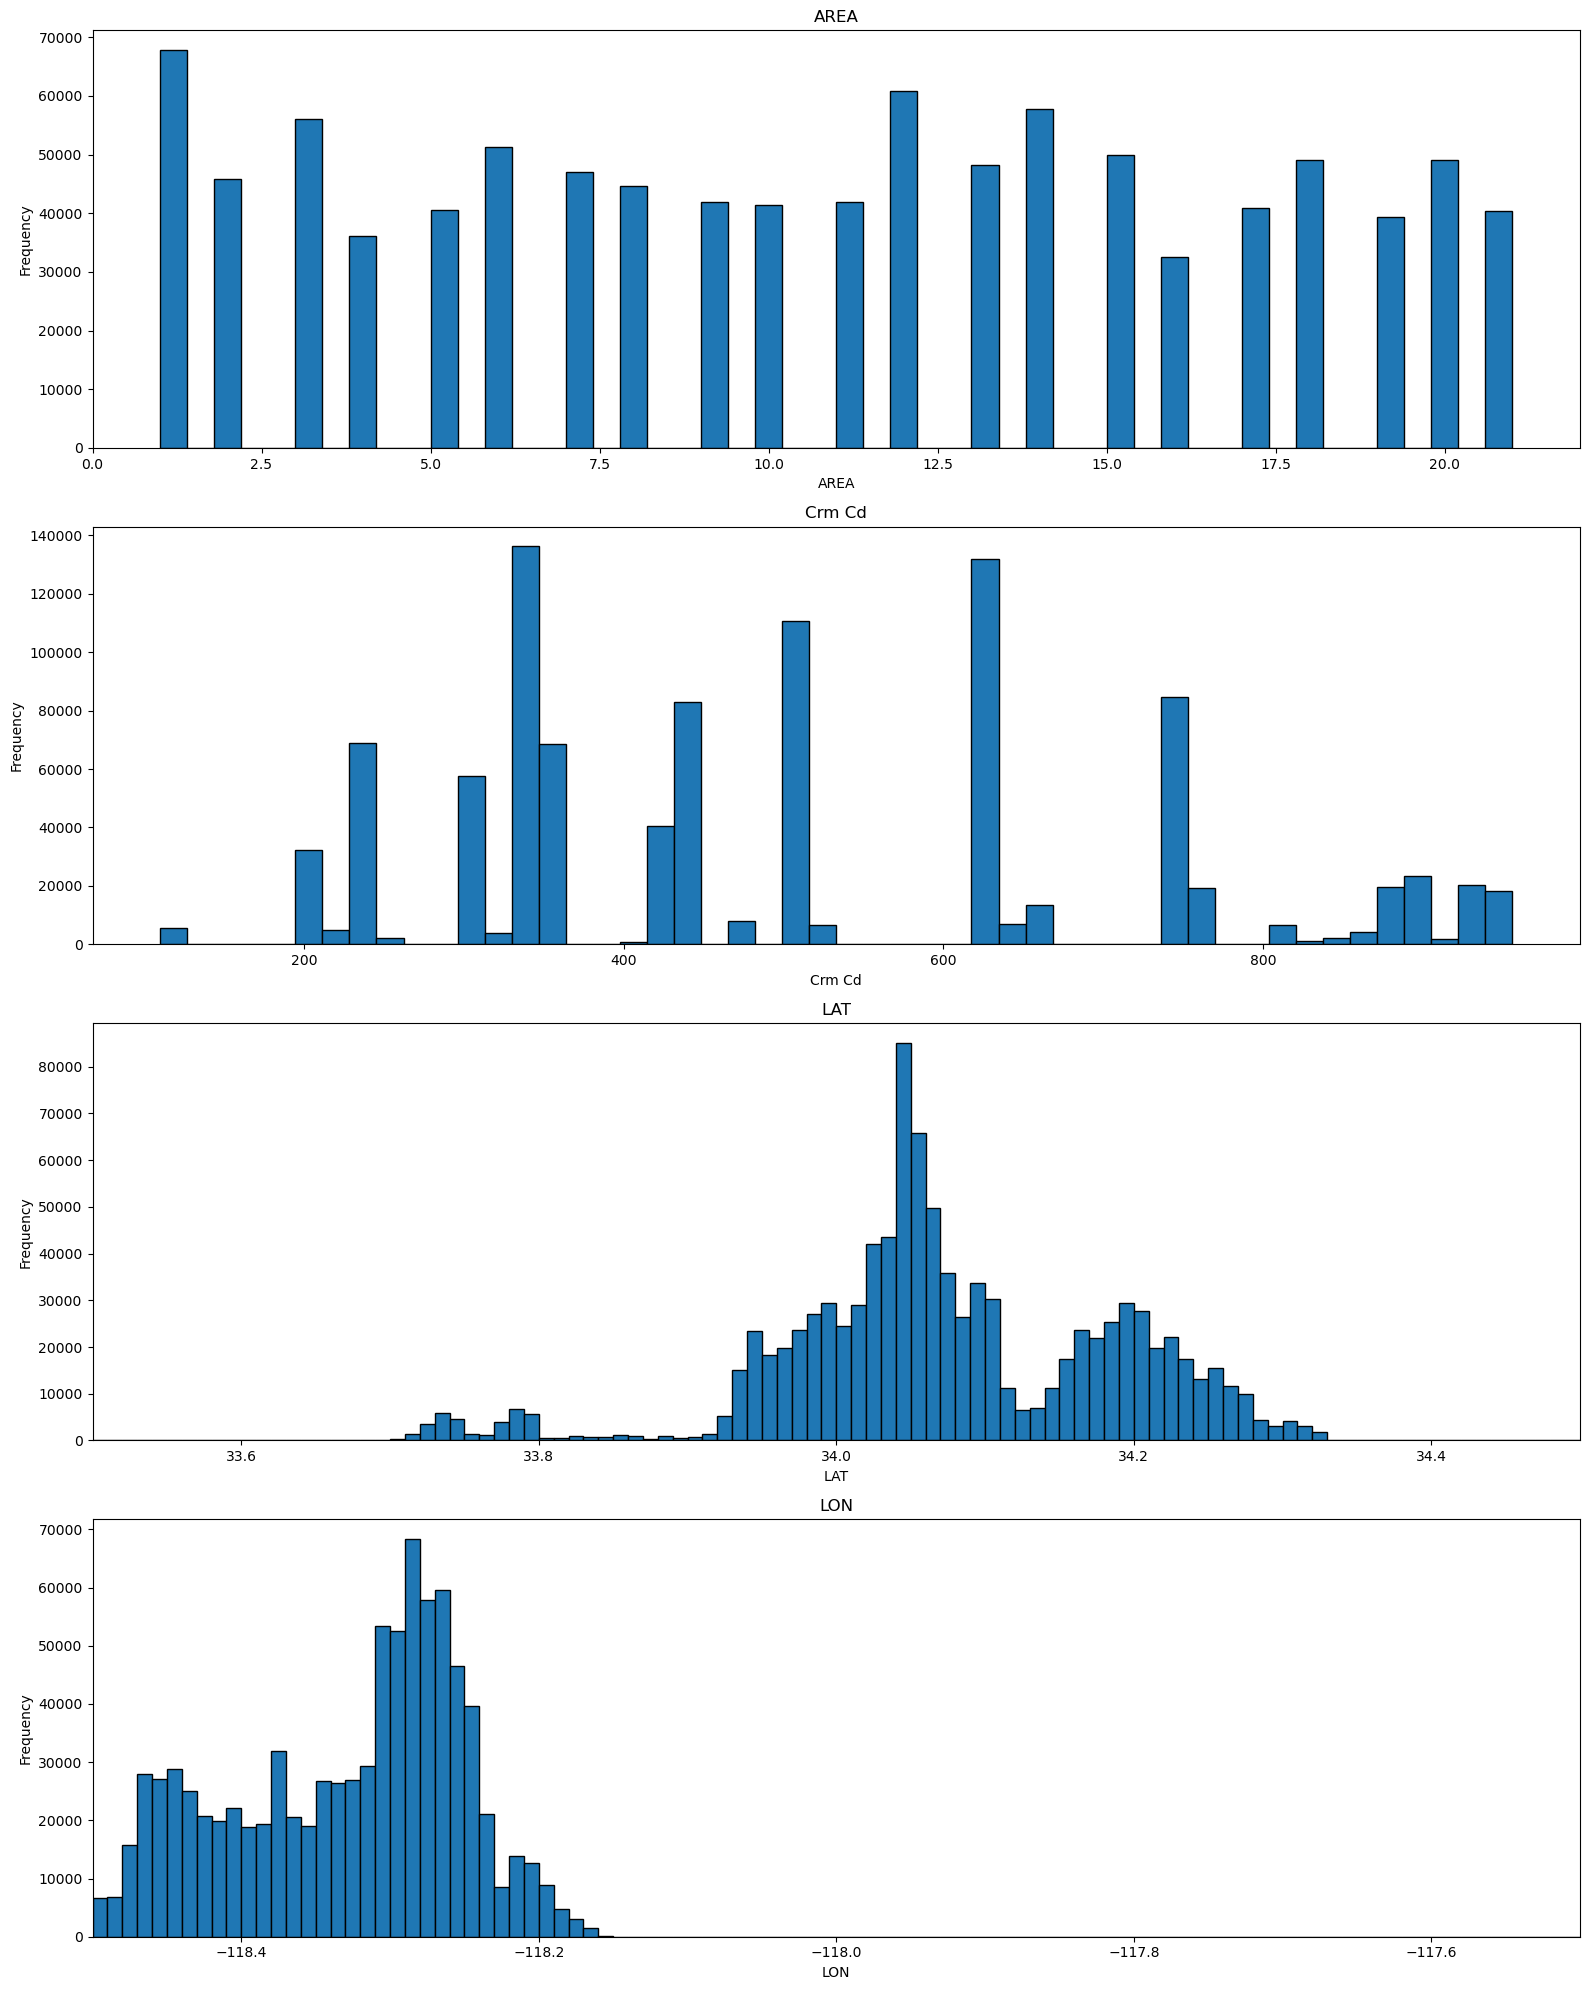

In [98]:
import matplotlib.pyplot as plt

# Set the figure size to make the plots wider
plt.figure(figsize=(16, 20))

# List of numeric columns in your dataset
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Loop through each numeric column and create a subplot for each
for i, col in enumerate(numeric_columns, 1):
    plt.subplot(len(numeric_columns), 1, i)  # Arrange plots vertically (1 column layout)
    
    # Check if the column is LAT or LON and apply specific settings for these
    if col == 'LAT':
        plt.hist(df[col], bins=100, edgecolor='black', range=(33.5, 34.5))  # Adjust range for LA latitude
        plt.xlim(33.5, 34.5)  # Latitude range for Los Angeles area
    elif col == 'LON':
        plt.hist(df[col], bins=100, edgecolor='black', range=(-118.5, -117.5))  # Adjust range for LA longitude
        plt.xlim(-118.5, -117.5)  # Longitude range for Los Angeles area
    else:
        plt.hist(df[col], bins=50, edgecolor='black')  # Default bins for other numeric columns

    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('Frequency')

# Adjust layout to prevent overlap and improve visibility
plt.tight_layout()
plt.show()


C:\Users\HP\AppData\Local\Temp\ipykernel_14412\1453849589.py:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


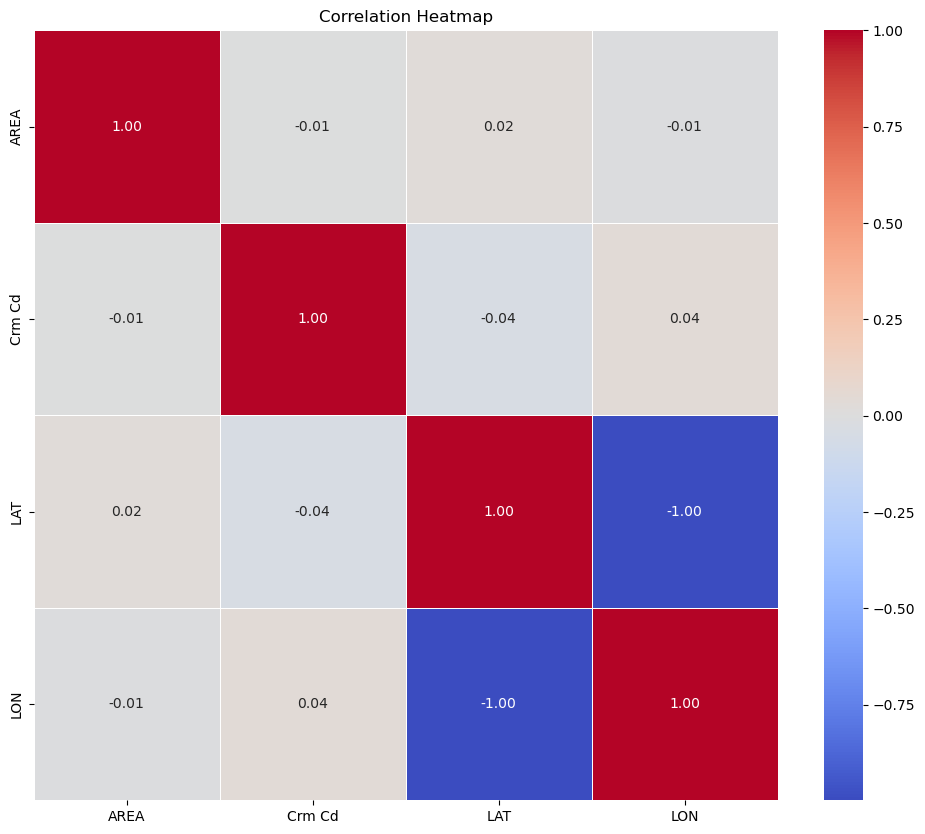

In [99]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
corr_matrix = df.corr()

# Set up the figure
plt.figure(figsize=(12, 10))

# Create the heatmap
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5, cbar=True)

# Add title
plt.title("Correlation Heatmap")

# Show the plot
plt.show()


In [100]:

from sklearn.preprocessing import LabelEncoder


# Step 1: Convert DATE OCC to datetime and extract day and hour
df['DATE OCC'] = pd.to_datetime(df['DATE OCC'])
df['Day of Week'] = df['DATE OCC'].dt.day_name()  # Get day name
df['Hour of Day'] = df['TIME OCC'].str.split(':').str[0]  # Extract hour from TIME OCC

# Step 2: Create a combined feature
df['Day_Hour'] = df['Day of Week'] + '_' + df['Hour of Day']  # Combine into a single feature

# Step 3: Encode the combined feature into numerical values
label_encoder = LabelEncoder()
df['Day_Hour_Numeric'] = label_encoder.fit_transform(df['Day_Hour'])

# Display the DataFrame with the new feature
print(df[['Day_Hour', 'Day_Hour_Numeric']])


AttributeError: Can only use .str accessor with string values!

In [ ]:
df.head()

In [ ]:
crime_severity = {
    "vehicle - stolen": 6,
    "burglary from vehicle": 5,
    "bike - stolen": 3,
    "shoplifting-grand theft ($950.01 & over)": 4,
    "theft of identity": 5,
    "battery - simple assault": 4,
    "sodomy/sexual contact b/w penis of one pers to anus oth": 9,
    "crm agnst chld (13 or under) (14-15 & susp 10 yrs older)": 10,
    "assault with deadly weapon, aggravated assault": 8,
    "letters, lewd  -  telephone calls, lewd": 4,
    "theft-grand ($950.01 & over)excpt,guns,fowl,livestk,prod": 5,
    "criminal threats - no weapon displayed": 5,
    "embezzlement, grand theft ($950.01 & over)": 6,
    "theft from motor vehicle - petty ($950 & under)": 3,
    "child annoying (17yrs & under)": 4,
    "theft plain - petty ($950 & under)": 3,
    "intimate partner - simple assault": 4,
    "lewd conduct": 6,
    "theft plain - attempt": 2,
    "burglary": 7,
    "theft from motor vehicle - grand ($950.01 and over)": 4,
    "robbery": 8,
    "bunco, grand theft": 5,
    "battery with sexual contact": 7,
    "intimate partner - aggravated assault": 7,
    "oral copulation": 9,
    "unauthorized computer access": 5,
    "sex,unlawful(inc mutual consent, penetration w/ frgn obj": 9,
    "violation of restraining order": 4,
    "shoplifting - petty theft ($950 & under)": 3,
    "vandalism - felony ($400 & over, all church vandalisms)": 4,
    "other miscellaneous crime": 1,
    "brandish weapon": 6,
    "document forgery / stolen felony": 5,
    "sex offender registrant out of compliance": 7,
    "rape, forcible": 10,
    "vandalism - misdeameanor ($399 or under)": 3,
    "child abuse (physical) - simple assault": 6,
    "credit cards, fraud use ($950.01 & over)": 5,
    "threatening phone calls/letters": 4,
    "sexual penetration w/foreign object": 9,
    "extortion": 6,
    "other assault": 5,
    "pickpocket": 3,
    "arson": 8,
    "disturbing the peace": 2,
    "bunco, attempt": 2,
    "human trafficking - involuntary servitude": 10,
    "pimping": 8,
    "peeping tom": 4,
    "violation of court order": 3,
    "contempt of court": 3,
    "false police report": 3,
    "contributing": 3,
    "false imprisonment": 7,
    "child abuse (physical) - aggravated assault": 8,
    "attempted robbery": 7,
    "credit cards, fraud use ($950 & under": 4,
    "child stealing": 8,
    "lewd/lascivious acts with child": 10,
    "embezzlement, petty theft ($950 & under)": 4,
    "indecent exposure": 5,
    "child neglect (see 300 w.i.c.)": 6,
    "stalking": 6,
    "dishonest employee - grand theft": 5,
    "trespassing": 3,
    "burglary, attempted": 5,
    "rape, attempted": 9,
    "discharge firearms/shots fired": 7,
    "human trafficking - commercial sex acts": 10,
    "vehicle - attempt stolen": 4,
    "pandering": 8,
    "firearms restraining order (firearms ro)": 6,
    "resisting arrest": 3,
    "burglary from vehicle, attempted": 4,
    "theft, person": 5,
    "battery police (simple)": 7,
    "vehicle, stolen - other (motorized scooters, bikes, etc)": 4,
    "theft from person - attempt": 3,
    "failure to yield": 2,
    "bomb scare": 6,
    "assault with deadly weapon on police officer": 9,
    "bunco, petty theft": 3,
    "shots fired at inhabited dwelling": 8,
    "defrauding innkeeper/theft of services, $950 & under": 3,
    "kidnapping - grand attempt": 9,
    "shots fired at moving vehicle, train or aircraft": 8,
    "till tap - grand theft ($950.01 & over)": 4,
    "violation of temporary restraining order": 4,
    "throwing object at moving vehicle": 6,
    "document worthless ($200.01 & over)": 3,
    "kidnapping": 10,
    "criminal homicide": 10,
    "purse snatching": 4,
    "theft from motor vehicle - attempt": 3,
    "dishonest employee - petty theft": 3,
    "child pornography": 10,
    "weapons possession/bombing": 8,
    "driving without owner consent (dwoc)": 3,
    "replica firearms(sale,display,manufacture or distribute)": 4,
    "lynching": 10,
    "reckless driving": 3,
    "shoplifting - attempt": 2,
    "counterfeit": 4,
    "defrauding innkeeper/theft of services, over $950.01": 5,
    "battery on a firefighter": 7,
    "cruelty to animals": 6,
    "boat - stolen": 4,
    "illegal dumping": 2,
    "prowler": 3,
    "drugs, to a minor": 8,
    "theft, coin machine - petty ($950 & under)": 3,
    "document worthless ($200 & under)": 2,
    "manslaughter, negligent": 8,
    "petty theft - auto repair": 2,
    "theft, coin machine - attempt": 2,
    "till tap - petty ($950 & under)": 3,
    "purse snatching - attempt": 3,
    "lynching - attempted": 9,
    "bike - attempted stolen": 2,
    "conspiracy": 5,
    "grand theft / auto repair": 5,
    "bribery": 5,
    "grand theft / insurance fraud": 5,
    "drunk roll": 2,
    "child abandonment": 6,
    "theft, coin machine - grand ($950.01 & over)": 4,
    "disrupt school": 2,
    "pickpocket, attempt": 2,
    "telephone property - damage": 3,
    "beastiality, crime against nature sexual asslt with anim": 10,
    "bigamy": 3,
    "failure to disperse": 2,
    "firearms emergency protective order (firearms epo)": 5,
    "incest (sexual acts between blood relatives)": 9,
    "blocking door induction center": 2,
    "inciting a riot": 7,
    "dishonest employee attempted theft": 3,
    "train wrecking": 9,
    "drunk roll - attempt": 2
}


def assign_risk_level(severity):
    if severity <= 3:
        return 'Low'
    elif severity <= 5:
        return 'Medium'
    elif severity <= 7:
        return 'High'
    else:
        return 'Critical'

# Map the severity level to the dataset
df['Severity Level'] = df['Crm Cd Desc'].map(crime_severity)

# Map the risk level using the severity level
df['Risk Level'] = df['Severity Level'].apply(assign_risk_level)

# Display the updated DataFrame
print(df.head())



In [ ]:
missing_values = df.isnull().sum()
missing_values

In [ ]:
# Length of the 'Crm Cd Desc' column
length = len(df['Crm Cd Desc'])

# Unique values in the 'Crm Cd Desc' column
unique_values = df['Crm Cd Desc'].unique()

# Count of unique values in the 'Crm Cd Desc' column
unique_count = df['Crm Cd Desc'].nunique()

# Display the results
print("Length of 'Crm Cd Desc' column:", length)
print("Unique values in 'Crm Cd Desc':", unique_values)
print("Number of unique values in 'Crm Cd Desc':", unique_count)


In [ ]:
# Identify missing values in the Severity Level column
missing_severity = df[df['Severity Level'].isna()]['Crm Cd Desc'].unique()

# Print the unique crime descriptions without a mapped severity
print("Descriptions missing in crime_severity:", missing_severity)

# Optional: Count the number of records for each missing description
missing_count = df[df['Crm Cd Desc'].isin(missing_severity)].groupby('Crm Cd Desc').size()
print(missing_count)


In [101]:
# Extract the time part from TIME OCC
df['TIME OCC'] = df['TIME OCC'].dt.strftime('%H:%M')

# Combine DATE OCC with the formatted TIME OCC
df['DATETIME'] = pd.to_datetime(df['DATE OCC'].dt.strftime('%Y-%m-%d') + ' ' + df['TIME OCC'])

# Check the result
df.head()


,DATE OCC,TIME OCC,AREA,AREA NAME,Crm Cd,Crm Cd Desc,LOCATION,LAT,LON,Day of Week,DATETIME
0,2020-03-01,21:30,7,wilshire,510,vehicle - stolen,1900 s longwood av,34.0375,-118.3506,Sunday,2020-03-01 21:30:00
1,2020-02-08,18:00,1,central,330,burglary from vehicle,1000 s flower st,34.0444,-118.2628,Saturday,2020-02-08 18:00:00
2,2020-11-04,17:00,3,southwest,480,bike - stolen,1400 w 37th st,34.0210,-118.3002,Wednesday,2020-11-04 17:00:00
3,2020-03-10,20:37,9,van nuys,343,shoplifting-grand theft ($950.01 & over),14000 riverside dr,34.1576,-118.4387,Tuesday,2020-03-10 20:37:00
4,2020-08-17,12:00,6,hollywood,354,theft of identity,1900 transient,34.0944,-118.3277,Monday,2020-08-17 12:00:00


In [ ]:
df.head()

In [ ]:
print(df.dtypes)

In [ ]:
df['DATETIME'] = pd.to_datetime(df['DATE OCC'] + ' ' + df['TIME OCC'])